# Work with string data using scalar functions
<!--
  ~ Licensed to the Apache Software Foundation (ASF) under one
  ~ or more contributor license agreements.  See the NOTICE file
  ~ distributed with this work for additional information
  ~ regarding copyright ownership.  The ASF licenses this file
  ~ to you under the Apache License, Version 2.0 (the
  ~ "License"); you may not use this file except in compliance
  ~ with the License.  You may obtain a copy of the License at
  ~
  ~   http://www.apache.org/licenses/LICENSE-2.0
  ~
  ~ Unless required by applicable law or agreed to in writing,
  ~ software distributed under the License is distributed on an
  ~ "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY
  ~ KIND, either express or implied.  See the License for the
  ~ specific language governing permissions and limitations
  ~ under the License.
  -->

Introductory paragraph - for example:

This tutorial demonstrates how to work with [feature](link to feature doc). In this tutorial you perform the following tasks:

- Task 1
- Task 2
- Task 3
- etc

## Table of contents

- [Prerequisites](#Prerequisites)
- [Initalization](#Initalization)
- [Clean up](#clean-up)
- [Summary](#summary)
- [Learn more](#learn-more)

## Prerequisites

This tutorial works with Druid 27.0.0 or later.

#### Run with Docker

Launch this tutorial and all prerequisites using the `druid-jupyter` profile of the Docker Compose file for Jupyter-based Druid tutorials. For more information, see [Docker for Jupyter Notebook tutorials](https://druid.apache.org/docs/latest/tutorials/tutorial-jupyter-docker.html).
   
#### Run without Docker

If you do not use the Docker Compose environment, you need the following:

* A running Apache Druid instance, with a `DRUID_HOST` local environment variable containing the server name of your Druid router
* [druidapi](https://github.com/apache/druid/blob/master/examples/quickstart/jupyter-notebooks/druidapi/README.md), a Python client for Apache Druid. Follow the instructions in the Install section of the README file.

* [matplotlib](https://matplotlib.org/), a library for creating visualizations in Python.
* [pandas](https://pandas.pydata.org/), a data analysis and manipulation tool.

## Initialization

The following cells set up the notebook and learning environment ready for use.

### Set up and connect to the learning environment

Run the next cell to set up the Druid Python client's connection to Apache Druid.

If successful, the Druid version number will be shown in the output.

In [1]:
import druidapi
import os

if 'DRUID_HOST' not in os.environ.keys():
    druid_host=f"http://localhost:8888"
else:
    druid_host=f"http://{os.environ['DRUID_HOST']}:8888"
    
print(f"Opening a connection to {druid_host}.")
druid = druidapi.jupyter_client(druid_host)

display = druid.display
sql_client = druid.sql
status_client = druid.status

status_client.version

Opening a connection to http://router:8888.


'27.0.0-SNAPSHOT'

### Load example data

Run the following cell to create a table called `example-koalas-strings`. Notice {the use of X as a timestamp | only required columns are ingested | WHERE / expressions / GROUP BY are front-loaded | partitions on X period and clusters by Y}.

When completed, you'll see a description of the final table.

In [2]:
sql='''
REPLACE INTO "example-koalas-strings" OVERWRITE ALL
WITH "ext" AS (SELECT *
FROM TABLE(
  EXTERN(
    '{"type":"http","uris":["https://static.imply.io/example-data/kttm-v2/kttm-v2-2019-08-25.json.gz"]}',
    '{"type":"json"}'
  )
) EXTEND ("timestamp" VARCHAR, "agent_category" VARCHAR, "agent_type" VARCHAR, "browser" VARCHAR, "browser_version" VARCHAR, "city" VARCHAR, "continent" VARCHAR, "country" VARCHAR, "version" VARCHAR, "event_type" VARCHAR, "event_subtype" VARCHAR, "loaded_image" VARCHAR, "adblock_list" VARCHAR, "forwarded_for" VARCHAR, "language" VARCHAR, "number" VARCHAR, "os" VARCHAR, "path" VARCHAR, "platform" VARCHAR, "referrer" VARCHAR, "referrer_host" VARCHAR, "region" VARCHAR, "remote_address" VARCHAR, "screen" VARCHAR, "session" VARCHAR, "session_length" BIGINT, "timezone" VARCHAR, "timezone_offset" VARCHAR, "window" VARCHAR))
SELECT
  TIME_PARSE("timestamp") AS "__time",
  "agent_category",
  "agent_type",
  "browser",
  "browser_version",
  "city",
  "continent",
  "country",
  "version",
  "event_type",
  "event_subtype",
  "loaded_image",
  "adblock_list",
  "forwarded_for",
  MV_TO_ARRAY("language") AS "language",
  "number",
  "os",
  "path",
  "platform",
  "referrer",
  "referrer_host",
  "region",
  "remote_address",
  "screen",
  "session",
  "session_length",
  "timezone",
  "timezone_offset",
  "window"
FROM "ext"
PARTITIONED BY DAY
'''

display.run_task(sql)
sql_client.wait_until_ready('example-koalas-strings')
display.table('example-koalas-strings')

Loading data, status:[SUCCESS]: 100%|██████████| 100.0/100.0 [00:24<00:00,  4.11it/s]            


Position,Name,Type
1,__time,TIMESTAMP
2,agent_category,VARCHAR
3,agent_type,VARCHAR
4,browser,VARCHAR
5,browser_version,VARCHAR
6,city,VARCHAR
7,continent,VARCHAR
8,country,VARCHAR
9,version,VARCHAR
10,event_type,VARCHAR


<!-- Include these cells if you need additional Python modules -->

### Import additional modules

Run the following cell to import additional Python modules that you will use to X, Y, Z.

In [3]:
# Add your modules here, remembering to align this with the prerequisites section

import json
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
## Manipulate values


In [ ]:
UPPER / LOWER

In [ ]:
STRING_FORMAT

In [ ]:
TRIM

In [ ]:
REVERSE

In [ ]:
## Add things to a string

In [ ]:
CONCAT / TEXTCAT

In [ ]:
REGEXP_REPLACE

In [ ]:
REPLACE

In [ ]:
REPEAT

In [ ]:
LPAD

In [ ]:
RPAD

In [ ]:
## Get bits out of a string

Run the following query to return only the filename from the image Url in the data.

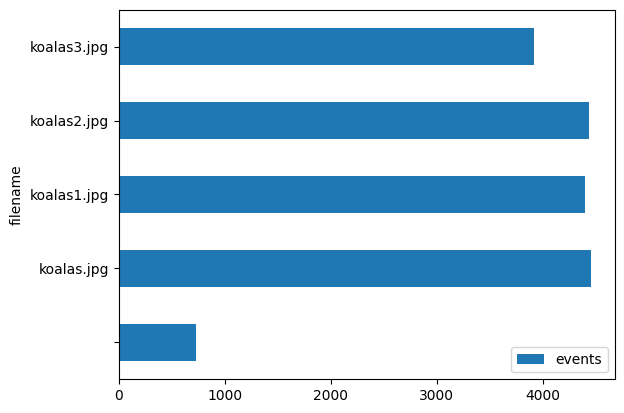

In [5]:
sql='''
SELECT
  REGEXP_EXTRACT("loaded_image",'[^/\\&\?]+\.\w{3,4}(?=([\?&].*$|$))') AS "filename",
  COUNT(*) AS "events"
FROM "example-koalas-strings"
WHERE TIME_IN_INTERVAL(__time,'2019-08-25T14/PT1H')
GROUP BY 1
'''

df = pd.DataFrame(sql_client.sql(sql))
df.plot.barh(x='filename', y='events')
plt.show()

The next cell contains a SQL statement that uses a regular expression with multiple matches.

In [ ]:
sql='''
SELECT
  REGEXP_EXTRACT("loaded_image",'^(([^:/?#]+):)?(//([^/?#]*))?([^?#]*)(\?([^#]*))?(#(.*))?',2) AS "scheme",
  REGEXP_EXTRACT("loaded_image",'^(([^:/?#]+):)?(//([^/?#]*))?([^?#]*)(\?([^#]*))?(#(.*))?',5) AS "path",
  COUNT(DISTINCT "browser")
FROM "example-koalas-strings"
WHERE TIME_IN_INTERVAL(__time,'2019-08-25T14/PT1H')
GROUP BY 1, 2
'''



In [ ]:
SUBSTRING

In [ ]:
RIGHT

In [ ]:
LEFT

In [ ]:
## Find things in a string

In [ ]:
POSITION / STRPOS

In [ ]:
REGEXP_LIKE

In [ ]:
CONTAINS_STRING

In [ ]:
ICONTAINS_STRING

## Clean up

Run the following cell to remove the XXX used in this notebook from the database.

In [ ]:
druid.datasources.drop("example-koalas-strings")

## Summary

* You learned this
* Remember this

## Learn more

* Try this out on your own data
* Solve for problem X that is't covered here
* Read docs pages
* Watch or read something cool from the community
* Do some exploratory stuff on your own

In [ ]:
# STANDARD CODE BLOCKS

# When just wanting to display some SQL results
display.sql(sql)

# When ingesting data:
display.run_task(sql)
sql_client.wait_until_ready('example-koalas-strings')
display.table('example-koalas-strings')

# When you want to make an EXPLAIN look pretty
print(json.dumps(json.loads(sql_client.explain_sql(sql)['PLAN']), indent=2))

# When you want a simple plot
df = pd.DataFrame(sql_client.sql(sql))
df.plot(x='x-axis', y='y-axis', marker='o')
plt.xticks(rotation=45, ha='right')
plt.gca().get_legend().remove()
plt.show()

# When you want to add some query context parameters
req = sql_client.sql_request(sql)
req.add_context("useApproximateTopN", "false")
resp = sql_client.sql_query(req)

# When you want to compare two different sets of results
df3 = df1.compare(df2, keep_equal=True)
df3